In [2]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [19]:
file = Path("../build/bin/res6f.txt")

params = {
"tau": 0,
"h": 0,
"T": 0,
"X": 0,
"Nx": 0,
"Nt": 0
}
vals = []

with open(file) as f:
  for line in f:
    line = line.split()
    name = line[0]
    if name[:-1] in params.keys():
      params[name[:-1]] = float(line[1])
    else:
      vals.append(float(name))

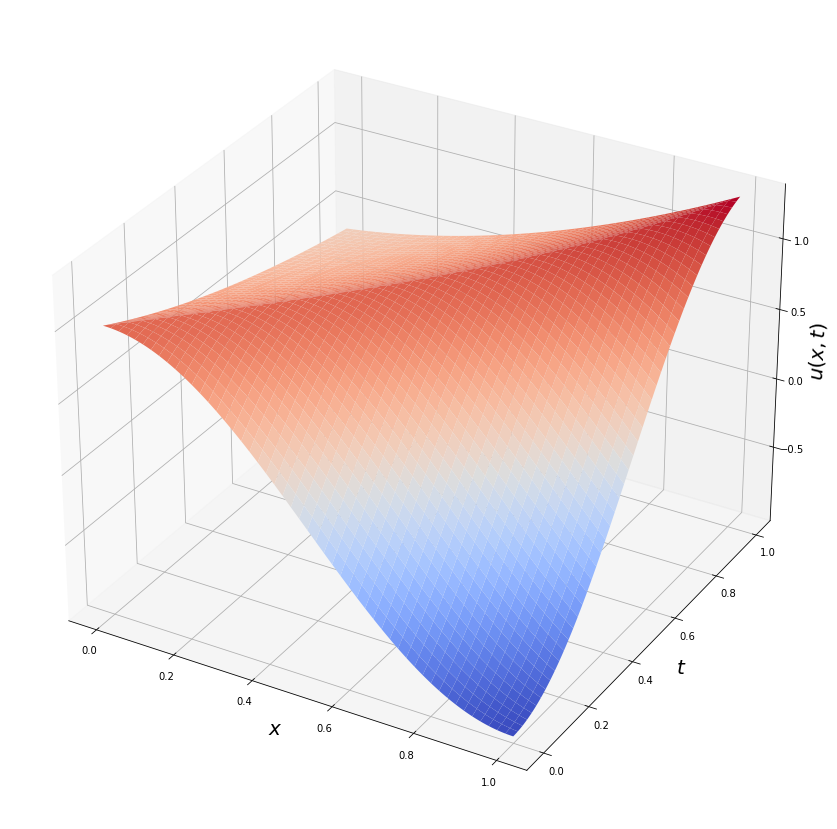

In [20]:
matr = np.zeros((int(params['Nt']), int(params['Nx'])))
for i in range(matr.shape[0]):
  for j in range(matr.shape[1]):
    matr[i][j] = vals[i * matr.shape[1] + j]

X = np.array([k * params['h'] for k in range(matr.shape[1])])
T = np.array([k * params['tau'] for k in range(matr.shape[0])])

X, T = np.meshgrid(X, T)
fg = plt.figure(figsize=(22, 15))
ax = fg.add_subplot(111, projection="3d")
ax.plot_surface(X, T, matr, cmap='coolwarm')
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$t$", fontsize=20)
ax.set_zlabel("$u(x, t)$", fontsize=20)
plt.show()

In [21]:
np.max(matr)

1.33333